In [1]:
import pypsa
network = r"C:/Users/hie/pe_tan/pypsa-earth/results/2040_base/networks/elec_s_all_ec_lcopt_1h.nc" # change for desired network
#network = r"C:/Users/hie/pe_tan/pypsa-earth/networks/veroni/elec_s_all_ec.nc"
#network=r"C:/Users/hie/pe_tan/pypsa-earth/networks/veroni/elec_s_all_ec_lcopt_24h.nc" #input network
#network=r'C:/Users/hie/pe_tan/pypsa-earth/networks/elec_s_75_ec.nc'
n = pypsa.Network(network)

loads = n.loads_t['p_set'].loc['2013']
print('/nTotal consumption in TWh:', round(loads.sum().sum()/1e6,2))

#print(n.snapshots)
#print(n.loads_t.p_set.index)

#subnetwork y/n
#a=n.determine_network_topology()
#print(a)

#n.loads_t.p.sum(axis=1).plot()

#n.loads_t.p_set.sum().sum()  # to confirm total load
#n.generators_t.p_max_pu.describe()  # upper bounds on generation


#norm= p.u values
#load_norm = n.loads_t.p_set.max()
#load = n.loads_t.p_set / load_norm
#print(load_norm.sum())
#print(load.sum())


#p_max_pu_norm = n.generators_t.p_max_pu.max()
#p_max_pu = n.generators_t.p_max_pu / p_max_pu_norm
#print(p_max_pu_norm.sum())
#print(p_max_pu.sum())


#inflow_norm = n.storage_units_t.inflow.max()
#inflow = n.storage_units_t.inflow / inflow_norm
#print(inflow_norm.sum())
#print(inflow.sum())


# Get all buses
all_buses = n.buses.index

# Get buses with loads
buses_with_loads = n.loads.bus.unique()


# Find buses without loads
buses_without_loads = all_buses.difference(buses_with_loads)

# Print results
print(f"Buses with loads: {len(buses_with_loads)}")
print(buses_with_loads)

print(f"Buses without loads: {len(buses_without_loads)}")
print(buses_without_loads)




INFO:pypsa.io:Imported network elec_s_all_ec_lcopt_1h.nc has buses, carriers, generators, lines, loads, storage_units


/nTotal consumption in TWh: 78.85
Buses with loads: 67
['2' '4' '7' '8' '10' '12' '15' '16' '17' '18' '19' '20' '21' '23' '25'
 '27' '28' '29' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40'
 '41' '42' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '55' '56'
 '57' '58' '60' '61' '63' '64' '66' '67' '68' '69' '70' '71' '72' '73'
 '74' '75' '76' '77' '78' '79' '80' '81' '82' '83']
Buses without loads: 0
Index([], dtype='object', name='Bus')


In [2]:
import pypsa
n=pypsa.Network("C:/Users/hie/pe_tan/pypsa-earth/networks/2040_base/elec.nc")

a=n.determine_network_topology()
print(a)
n.buses.query("carrier ='AC'").sub_networks.unique()


INFO:pypsa.io:Imported network elec.nc has buses, carriers, generators, lines, loads, storage_units, transformers


None


ValueError: cannot assign without a target object

INFO:pypsa.io:Imported network elec_s_all_ec_lcopt_1h.nc has buses, carriers, generators, lines, loads, storage_units


{78849999.99998802}
/n=== Snapshots and Time Resolution ===
Number of snapshots: 8760
Snapshot range: 2013-01-01 00:00:00 to 2013-12-31 23:00:00
Snapshot resolution: 0 days 01:00:00
/n=== Load Data Summary ===
Total expected load (p_set): 78850000.00 MWh
Total actual supplied load (p): 78850000.00 MWh
Fraction served: 100.00%


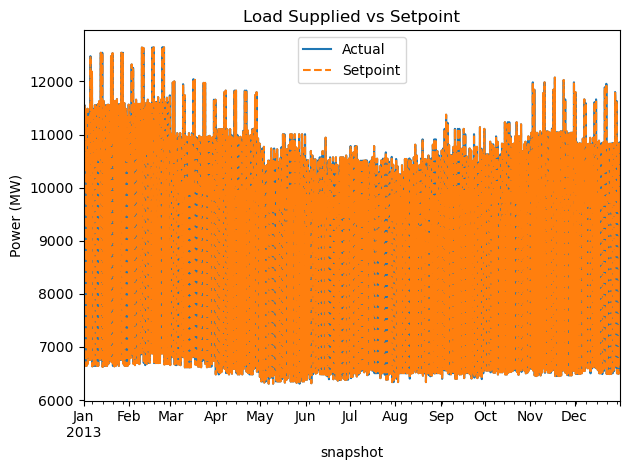

/n=== Generator Capacity ===
carrier
CCGT          1.192700e+03
OCGT          1.850000e+02
biomass       1.050000e+01
coal          6.000000e+02
geothermal    1.350000e+02
load          6.700000e+10
offwind-ac    0.000000e+00
offwind-dc    0.000000e+00
oil           1.046000e+02
onwind        9.111054e-01
ror           6.017862e+02
solar         1.447161e+01
Name: p_nom, dtype: float64
/n=== Generator Availability (p_max_pu) ===
Generator     0 onwind      0 solar      1 hydro     10 hydro    11 onwind  \
count      8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          0.098620     0.155924     0.439808     0.653476     0.112424   
std           0.089869     0.199794     0.221709     0.308117     0.124849   
min           0.000000     0.000000     0.145593     0.228940     0.000000   
25%           0.027896     0.000000     0.196588     0.305674     0.012343   
50%           0.079918     0.000000     0.376852     0.585802     0.067565   
75%           0.14379

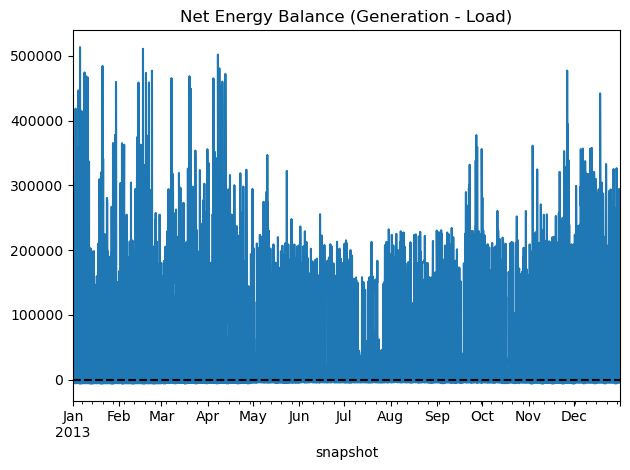

In [3]:
import pypsa
import pandas as pd
import matplotlib.pyplot as plt



network = r"C:/Users/hie/pe_tan/pypsa-earth/results/2040_base/networks/elec_s_all_ec_lcopt_1h.nc" # change for desired network
#network = r"C:/Users/hie/pe_tan/pypsa-earth/networks/veroni/elec_s_all_ec.nc"
#network=r"C:/Users/hie/pe_tan/pypsa-earth/networks/veroni/elec_s_all_ec_lcopt_24h.nc" #input network
#network=r'C:/Users/hie/pe_tan/pypsa-earth/networks/elec_s_75_ec.nc' 
# Load your prepared network
n = pypsa.Network(network)


print({n.loads_t.p_set.sum().sum()})
# -----------------------------
# Summary Diagnostics
# -----------------------------
print("/n=== Snapshots and Time Resolution ===")
print(f"Number of snapshots: {len(n.snapshots)}")
print(f"Snapshot range: {n.snapshots.min()} to {n.snapshots.max()}")
print(f"Snapshot resolution: {(n.snapshots[1] - n.snapshots[0])}")

# -----------------------------
# Load Check
# -----------------------------
print("/n=== Load Data Summary ===")
load_set = n.loads_t.p_set.sum().sum()
load_actual = n.loads_t.p.sum().sum()
print(f"Total expected load (p_set): {load_set:.2f} MWh")
print(f"Total actual supplied load (p): {load_actual:.2f} MWh")
print(f"Fraction served: {load_actual / load_set:.2%}")

# Time series plot
plt.figure()
n.loads_t.p.sum(axis=1).plot(label="Actual")
n.loads_t.p_set.sum(axis=1).plot(label="Setpoint", linestyle="--")
plt.title("Load Supplied vs Setpoint")
plt.ylabel("Power (MW)")
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# Generator and Storage Capacity
# -----------------------------
print("/n=== Generator Capacity ===")
print(n.generators.groupby("carrier")["p_nom"].sum())

print("/n=== Generator Availability (p_max_pu) ===")
print(n.generators_t.p_max_pu.describe())

if not n.storage_units.empty:
    print("/n=== Storage Summary ===")
    print(n.storage_units[["p_nom", "max_hours"]])
    print(n.storage_units_t.state_of_charge.describe())

# -----------------------------
# Transmission & Links
# -----------------------------
print("/n=== Link and Line Capacity ===")
if not n.lines.empty:
    print("Lines:")
    print(n.lines[["s_nom"]].describe())
if not n.links.empty:
    print("Links:")
    print(n.links[["p_nom"]].describe())

# -----------------------------
# Check if any buses lost all connections
# -----------------------------
connected_buses = set(n.lines.bus0).union(n.lines.bus1).union(n.links.bus0).union(n.links.bus1)
unconnected_buses = set(n.buses.index) - connected_buses
print(f"/n=== Unconnected Buses ===/nFound {len(unconnected_buses)} unconnected buses.")
if len(unconnected_buses) > 0:
    print(list(unconnected_buses)[:10], "...")

# -----------------------------
# Load Shedding Detection
# -----------------------------
print("/n=== Check for Load Shedding ===")
shed_generators = n.generators[n.generators.carrier.str.contains("load_shedding", case=False, na=False)]
if not shed_generators.empty:
    print(f"Found {len(shed_generators)} load shedding generators.")
    shed_energy = n.generators_t.p[shed_generators.index].sum().sum()
    print(f"Total load shed via virtual generators: {shed_energy:.2f} MWh")
else:
    print("No explicit load shedding generators found.")

# -----------------------------
# Check Cost Parameters
# -----------------------------
print("/n=== Generator Marginal Costs (first 10) ===")
print(n.generators.marginal_cost.sort_values(ascending=False).head(10))

# -----------------------------
# Energy Balance Check
# -----------------------------
print("/n=== Energy Balance Check ===")
energy_in = n.generators_t.p.sum(axis=1)
energy_out = n.loads_t.p.sum(axis=1) + n.storage_units_t.p.sum(axis=1) if not n.storage_units.empty else n.loads_t.p.sum(axis=1)
plt.figure()
(energy_in - energy_out).plot()
plt.title("Net Energy Balance (Generation - Load)")
plt.axhline(0, color='k', linestyle='--')
plt.tight_layout()
plt.show()


INFO:pypsa.io:Imported network elec_s_all_ec_lcopt_1h.nc has buses, carriers, generators, lines, links, loads, storage_units, stores



=== Snapshots and Time Resolution ===
Number of snapshots: 8760
Snapshot range: 2013-01-01 00:00:00 to 2013-12-31 23:00:00
Snapshot resolution: 0 days 01:00:00

=== Load Data Summary ===
Total expected load (p_set): 10440526.56 MWh
Total actual supplied load (p): 10440526.56 MWh
Fraction served: 100.00%


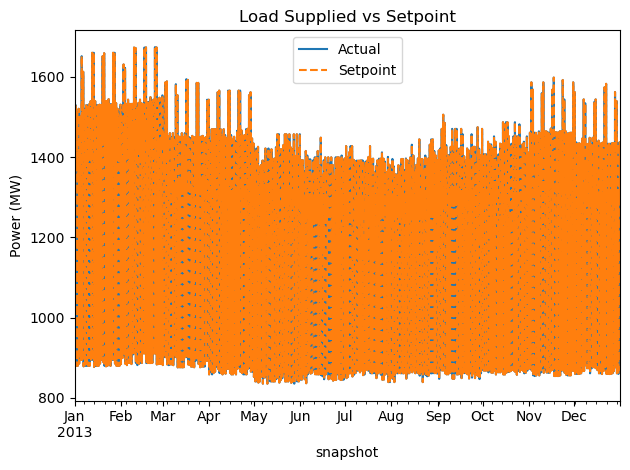


=== Generator Capacity ===
carrier
CCGT          1.192700e+03
OCGT          1.850000e+02
biomass       1.050000e+01
coal          6.000000e+02
geothermal    1.350000e+02
load          1.620000e+11
offwind-ac    0.000000e+00
offwind-dc    0.000000e+00
oil           8.880000e+01
onwind        9.119919e-01
ror           6.017862e+02
solar         1.431497e+01
Name: p_nom, dtype: float64

=== Generator Availability (p_max_pu) ===
Generator     0 onwind      0 solar      1 hydro  1 offwind-ac  1 offwind-dc  \
count      8760.000000  8760.000000  8760.000000   8760.000000        8760.0   
mean          0.138803     0.160188     0.006769      0.142643           0.0   
std           0.130929     0.205333     0.026642      0.129943           0.0   
min           0.000000     0.000000     0.000000      0.000000           0.0   
25%           0.046817     0.000000     0.000000      0.045235           0.0   
50%           0.101994     0.000000     0.000000      0.107979           0.0   
75%      

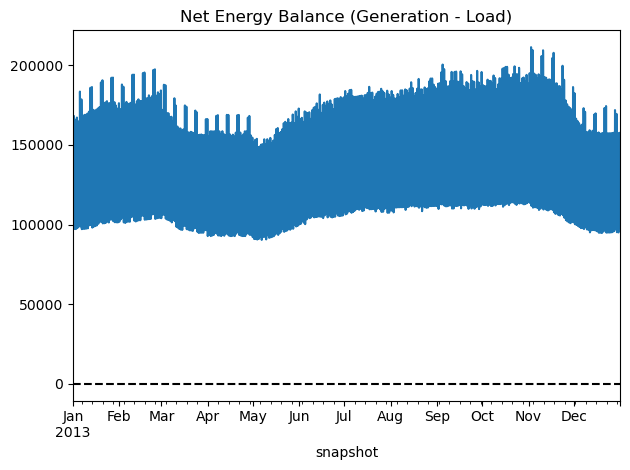

In [ ]:
import pypsa
import pandas as pd
import matplotlib.pyplot as plt



#network = r"C:/Users/hie/pe_tan/pypsa-earth/results/veroni/networks/elec_s_all_ec_lcopt_24h.nc" # change for desired network
#network = r"C:/Users/hie/pe_tan/pypsa-earth/networks/veroni/elec_s_all_ec.nc"
#network=r"C:/Users/hie/pe_tan/pypsa-earth/networks/veroni/elec_s_all_ec_lcopt_24h.nc" #input network
network= r"C:/Users/hie/pe_tan/pypsa-earth/results/veroni/networks/elec_s_all_ec_lcopt_1h.nc"
#network=r'C:/Users/hie/pe_tan/pypsa-earth/networks/elec_s_75_ec.nc' 
# Load your prepared network
n = pypsa.Network(network)

# -----------------------------
# Summary Diagnostics
# -----------------------------
print("/n=== Snapshots and Time Resolution ===")
print(f"Number of snapshots: {len(n.snapshots)}")
print(f"Snapshot range: {n.snapshots.min()} to {n.snapshots.max()}")
print(f"Snapshot resolution: {(n.snapshots[1] - n.snapshots[0])}")

# -----------------------------
# Load Check
# -----------------------------
print("/n=== Load Data Summary ===")
load_set = n.loads_t.p_set.sum().sum()
load_actual = n.loads_t.p.sum().sum()
print(f"Total expected load (p_set): {load_set:.2f} MWh")
print(f"Total actual supplied load (p): {load_actual:.2f} MWh")
print(f"Fraction served: {load_actual / load_set:.2%}")

# Time series plot
plt.figure()
n.loads_t.p.sum(axis=1).plot(label="Actual")
n.loads_t.p_set.sum(axis=1).plot(label="Setpoint", linestyle="--")
plt.title("Load Supplied vs Setpoint")
plt.ylabel("Power (MW)")
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# Generator and Storage Capacity
# -----------------------------
print("/n=== Generator Capacity ===")
print(n.generators.groupby("carrier")["p_nom"].sum())

print("/n=== Generator Availability (p_max_pu) ===")
print(n.generators_t.p_max_pu.describe())

if not n.storage_units.empty:
    print("/n=== Storage Summary ===")
    print(n.storage_units[["p_nom", "max_hours"]])
    print(n.storage_units_t.state_of_charge.describe())

# -----------------------------
# Transmission & Links
# -----------------------------
print("/n=== Link and Line Capacity ===")
if not n.lines.empty:
    print("Lines:")
    print(n.lines[["s_nom"]].describe())
if not n.links.empty:
    print("Links:")
    print(n.links[["p_nom"]].describe())

# -----------------------------
# Check if any buses lost all connections
# -----------------------------
connected_buses = set(n.lines.bus0).union(n.lines.bus1).union(n.links.bus0).union(n.links.bus1)
unconnected_buses = set(n.buses.index) - connected_buses
print(f"/n=== Unconnected Buses ===/nFound {len(unconnected_buses)} unconnected buses.")
if len(unconnected_buses) > 0:
    print(list(unconnected_buses)[:10], "...")

# -----------------------------
# Load Shedding Detection
# -----------------------------
print("/n=== Check for Load Shedding ===")
shed_generators = n.generators[n.generators.carrier.str.contains("load_shedding", case=False, na=False)]
if not shed_generators.empty:
    print(f"Found {len(shed_generators)} load shedding generators.")
    shed_energy = n.generators_t.p[shed_generators.index].sum().sum()
    print(f"Total load shed via virtual generators: {shed_energy:.2f} MWh")
else:
    print("No explicit load shedding generators found.")

# -----------------------------
# Check Cost Parameters
# -----------------------------
print("/n=== Generator Marginal Costs (first 10) ===")
print(n.generators.marginal_cost.sort_values(ascending=False).head(10))

# -----------------------------
# Energy Balance Check
# -----------------------------
print("/n=== Energy Balance Check ===")
energy_in = n.generators_t.p.sum(axis=1)
energy_out = n.loads_t.p.sum(axis=1) + n.storage_units_t.p.sum(axis=1) if not n.storage_units.empty else n.loads_t.p.sum(axis=1)
plt.figure()
(energy_in - energy_out).plot()
plt.title("Net Energy Balance (Generation - Load)")
plt.axhline(0, color='k', linestyle='--')
plt.tight_layout()
plt.show()
